In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data        = pd.read_hdf("/ceph/aavocone/Datasets/signal3_large.h5", "df")
charged     = pd.read_hdf("/ceph/aavocone/Datasets/charged_large.h5", "df")
mixed       = pd.read_hdf("/ceph/aavocone/Datasets/mixed_large.h5", "df")
uu          = pd.read_hdf("/ceph/aavocone/Datasets/uu_large.h5", "df")
cc          = pd.read_hdf("/ceph/aavocone/Datasets/cc_large.h5", "df")
dd          = pd.read_hdf("/ceph/aavocone/Datasets/dd_large.h5", "df")
ss          = pd.read_hdf("/ceph/aavocone/Datasets/ss_large.h5", "df")
sets =[data,charged,mixed,uu,cc,dd,ss]
df = pd.concat(sets)

/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## get model and prediction

In [5]:

#test train split
X = df[df.columns[:-3]]    #exclude "signal" "classification" "B_sig_isSignalAcceptMissingNeutrino"
y = df["signal"]            
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5, stratify= ytrain)

model50 = xgb.XGBClassifier()
model50.load_model("/work/aavocone/models/model50.txt")

model100 = xgb.XGBClassifier()
model100.load_model("/work/aavocone/models/model100.txt")

model200 = xgb.XGBClassifier()
model200.load_model("/work/aavocone/models/model200.txt")

model500 = xgb.XGBClassifier()
model500.load_model("/work/aavocone/models/model500.txt")


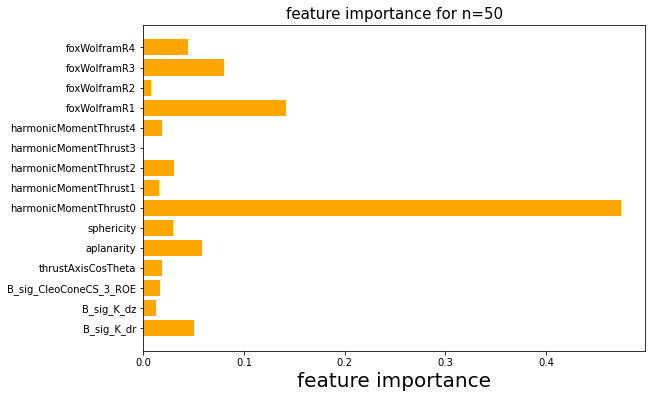

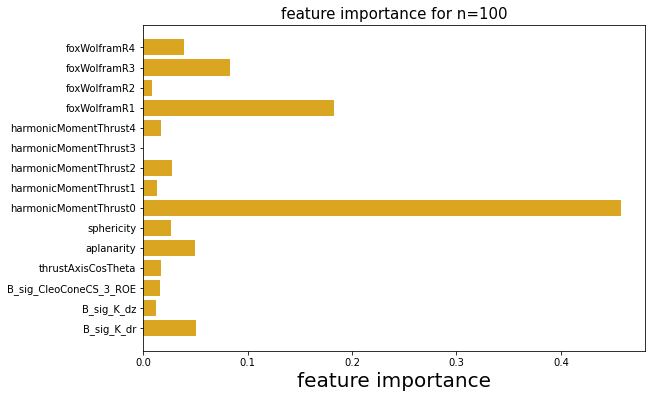

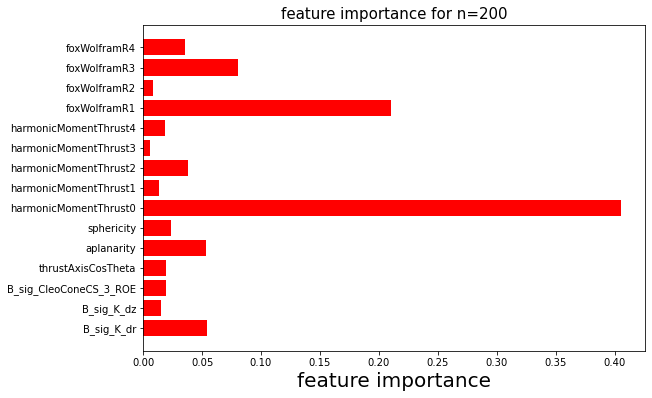

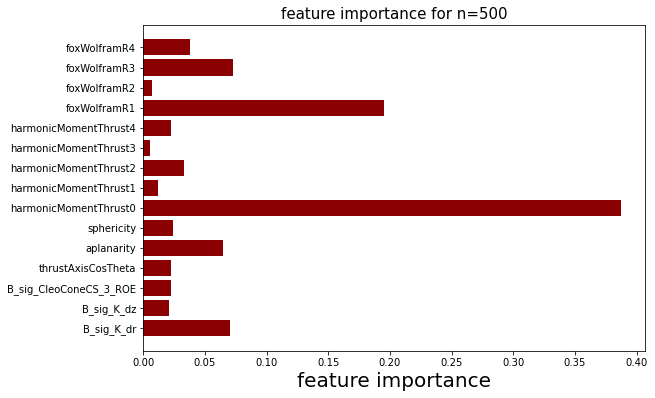

In [16]:
ranking50 = model50.feature_importances_
ranking100 = model100.feature_importances_
ranking200 = model200.feature_importances_
ranking500 = model500.feature_importances_

plt.figure(figsize=(9,6))
plt.barh(xtrain.columns,ranking50,color="orange")
plt.title("feature importance for n=50",fontsize=15)
plt.xlabel("feature importance",fontsize=20)
plt.savefig("/work/aavocone/week5/value_ranking50.jpeg")
plt.show()

plt.figure(figsize=(9,6))
plt.barh(xtrain.columns,ranking100,color="goldenrod")
plt.title("feature importance for n=100",fontsize=15)
plt.xlabel("feature importance",fontsize=20)
plt.savefig("/work/aavocone/week5/value_ranking100.jpeg")
plt.show()

plt.figure(figsize=(9,6))
plt.barh(xtrain.columns,ranking200,color="r")
plt.title("feature importance for n=200",fontsize=15)
plt.xlabel("feature importance",fontsize=20)
plt.savefig("/work/aavocone/week5/value_ranking200.jpeg")
plt.show()

plt.figure(figsize=(9,6))
plt.barh(xtrain.columns,ranking500,color="darkred")
plt.title("feature importance for n=500",fontsize=15)
plt.xlabel("feature importance",fontsize=20)
plt.savefig("/work/aavocone/week5/value_ranking500.jpeg")
plt.show()


## correlation


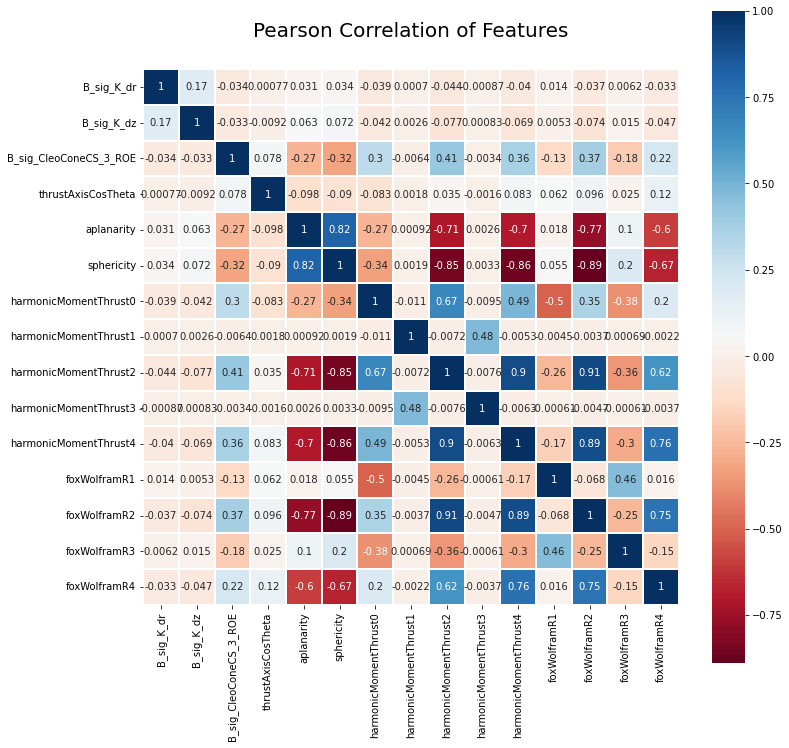

In [7]:
import seaborn as sns

colormap = plt.cm.RdBu
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig(f"/work/aavocone/week9/pearson_corr.pdf", format="pdf",bbox_inches="tight")
plt.show()
